# 기본설정

- 한글 폰트 설정하기

In [25]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

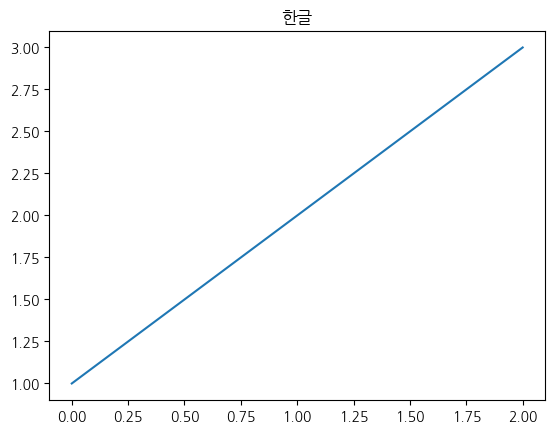

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

# Google Colab 빅쿼리 연동

In [27]:
from google.colab import auth
auth.authenticate_user()

# 데이터 가져오기
- 공식문서 참조 : https://pandas.pydata.org/docs/reference/api/pandas.read_gbq.html

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
project_id = 'multi-telecom'
sql = '''
SELECT * FROM `multi-telecom.churn_rate.telecom_stats` LIMIT 7100
'''

df = pd.read_gbq(sql, project_id = project_id, dialect = 'standard')
df

,gender,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,ChurnCategory_Dissatisfaction,ChurnCategory_Other,ChurnCategory_Price,Service_Num,Age_Group_Under_20,Age_Group_20_30,Age_Group_30_40,Age_Group_40_50,Age_Group_50_65,Age_Group_Over65
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,15,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,0,1,4,1,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,68,1,1,1,1,1,1,1,...,0,0,0,12,0,0,0,0,1,0
7039,1,1,70,1,1,1,0,1,1,1,...,0,0,0,12,0,0,1,0,0,0
7040,0,0,63,1,1,1,0,1,1,1,...,0,0,0,12,0,0,0,1,0,0
7041,0,0,57,1,1,1,0,1,1,1,...,0,0,0,12,0,1,0,0,0,0


## 데이터 정의

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   gender                              7043 non-null   Int64  
 1   Dependents                          7043 non-null   Int64  
 2   tenure                              7043 non-null   Int64  
 3   PhoneService                        7043 non-null   Int64  
 4   MultipleLines                       7043 non-null   Int64  
 5   InternetService                     7043 non-null   Int64  
 6   OnlineSecurity                      7043 non-null   Int64  
 7   OnlineBackup                        7043 non-null   Int64  
 8   DeviceProtection                    7043 non-null   Int64  
 9   TechSupport                         7043 non-null   Int64  
 10  StreamingTV                         7043 non-null   Int64  
 11  StreamingMovies                     7043 no

# 전체적인 군집분석
- 고객 이탈과 관련이 있는 군집들을 모아 분석함.

## 컬럼 정리

In [31]:
df = df.drop(['ChurnReason', 'Service_Num'], axis = 1)

In [32]:
df['TotalCharges'].fillna(0, inplace=True)

- 0 값이 빅쿼리에서 넘어가면서 결측치로 변해버린걸 채움.

## 표준화 스케일링

In [34]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ['tenure' ,'MonthlyCharges', 'TotalCharges', 'CLTV', 'Age', 'TotalLongDistanceCharges', 'TotalRevenue', 'SatisfactionScore', 'TotalExtraDataCharges', 'ChurnScore', 'NumberOfReferrals', 'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload', 'TotalRefunds']

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [35]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_model.fit(df.drop('Churn', axis=1))
df['Cluster'] = kmeans_model.labels_

print(df['Cluster'].value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    2052
3    1856
0    1664
2    1471
Name: Cluster, dtype: int64


- 시각화를 위한 차원축소

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


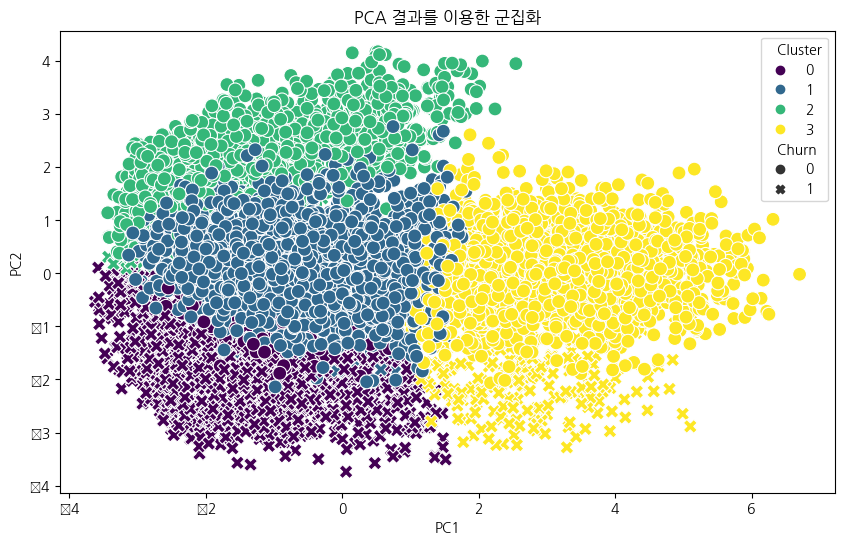

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(['Churn', 'Cluster'], axis=1))

pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']
pca_df['Churn'] = df['Churn']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', style='Churn', data=pca_df, palette='viridis', s=100)
plt.title('PCA 결과를 이용한 군집화')
plt.show()

- 전체적인 측면의 군집간 평가 시행

In [37]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz = calinski_harabasz_score(df.drop('Churn', axis=1), df['Cluster'])
print("Calinski-Harabasz 점수:", calinski_harabasz)

Calinski-Harabasz 점수: 1154.954837622202


=> 높다의 기준은 상대적으로 적용되나, 일반적으로 1000 이상일 경우 높은편에 속하며, 높을수록 군집화가 잘 되어있음을 의미함.

In [38]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df.drop('Churn', axis=1), df['Cluster'])
print("실루엣 점수:", silhouette_avg)

실루엣 점수: 0.148981196709718


=> -1 ~ 1 중에 나오지만, 높을수록 군집화가 잘 되어있음을 의미하며, 일반적으로 0.5 이상이면 잘되었다고 하지만, 현재 결과로 군집은 어느정도 형성되어있음을 의미함.

군집 수를 변경해봤으나, 실루엣점수는 큰 변동이 없어 Calinski-Harabasz 점수가 높은 군집 수를 택함.

- 군집내 각 샘플에 대한 품질 평가 시행
 + 군집내 샘플에서 다른 군집과의 거리측정 방법사용
 + 군집의 응집성, 군집간의 분리성을 평가함

In [39]:
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(df.drop('Cluster', axis=1), df['Cluster'])
print(score_samples.shape)

df['silhouette_coeff'] = score_samples

average_score = silhouette_score(df.drop('Cluster', axis=1), df['Cluster'])
print('Silhouette Analysis Score: {0:.3f}'.format(average_score))

df

(7043,)
Silhouette Analysis Score: 0.130


,gender,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,ChurnCategory_Other,ChurnCategory_Price,Age_Group_Under_20,Age_Group_20_30,Age_Group_30_40,Age_Group_40_50,Age_Group_50_65,Age_Group_Over65,Cluster,silhouette_coeff
0,1,0,-1.277445,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.078010
1,0,0,-0.707359,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0.052139
2,0,1,-1.155283,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0.044670
3,0,0,-1.277445,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0.012802
4,1,0,-1.277445,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.056068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1.450820,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,3,0.121610
7039,1,1,1.532261,1,1,1,0,1,1,1,...,0,0,0,0,1,0,0,0,3,0.255253
7040,0,0,1.247218,1,1,1,0,1,1,1,...,0,0,0,0,0,1,0,0,3,0.193468
7041,0,0,1.002896,1,1,1,0,1,1,1,...,0,0,0,1,0,0,0,0,3,0.137512


## 군집분석 결과
- 각 군집의 평균값을 토대로 해석함.

In [40]:
cluster_means = df.groupby('Cluster').mean()

with pd.option_context('display.max_columns', None):
    print(cluster_means)

           gender  Dependents    tenure  PhoneService  MultipleLines  \
Cluster                                                                
0        0.489784    0.149038 -0.815156      0.904447       0.408053   
1        0.518031    0.278752 -0.345361      0.763158       0.285575   
2        0.505099     0.42896 -0.025217           1.0       0.230455   
3        0.503233    0.355065  1.132648      0.980065        0.73653   

         InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
Cluster                                                                    
0               0.957332         0.14363      0.235577          0.245192   
1                    1.0        0.350877      0.365497          0.356238   
2               0.010877         0.00136       0.00068           0.00068   
3                    1.0        0.570043      0.692888          0.690733   

         TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  \
Cluster                               

### Cluster 0
- Gender: 약 49% 여성
- Dependents: 약 15%가 부양자
- Tenure: 평균 tenure은 약 -0.82로 비교적 짧은 기간
- PhoneService: 약 90%가 PhoneService 사용
- MultipleLines: 약 41%가 MultipleLines 사용
- InternetService: 대부분이 InternetService를 사용 (약 97.5%)
- OnlineSecurity: 약 14.4%가 OnlineSecurity 사용
- OnlineBackup: 약 23.4%가 OnlineBackup 사용
- DeviceProtection: 약 24.7%가 DeviceProtection 사용
- TechSupport: 약 13.9%
- Streaming TV: 약 39.61%
- Streaming Movies: 약 39.86%
- Paperless Billing: 약 76.12%
- Monthly Charges: 약 0.29
- Total Charges: 약 -0.58
- Churn: 약 95.83%
- Churn Score: 약 110%
- CLTV (Customer Lifetime Value): 약 -33%
- Married: 약 30.16%
- Referred a Friend: 약 28.36%
- Number of Referrals: 약 -51%
- Average Monthly Long Distance Charges: 약 -2%
- Average Monthly GB Download: 약 9%
- Streaming Music: 약 36.26%
- Premium Tech Support: 약 13.93%
- Unlimited Data: 약 84.27%
- Total Refunds: 약 -6%
- Total Extra Data Charges: 약 -4%
- Total Long Distance Charges: 약 -57%
- Total Revenue: 약 -63%
- Satisfaction Score: 약 -125%
- Contract_1: 약 96.21%
- Contract_12: 약 3.61%
- Contract_24: 약 0.19%
- Payment Method (Bank Transfer Auto): 약 11.19%
- Payment Method (Credit Card Auto): 약 11.44%
- Payment Method (Electronic Check): 약 61.1%
- Payment Method (Credit Mailed Check): 약 16.2%
- ChurnCategory_0: 약 4.2%
- ChurnCategory_Attitude: 약 15.2%
- ChurnCategory_Competitor: 약 44.4%
- Churn Category (Dissatisfaction): 약 15.92%
- Churn Category (Other): 약 10.51%
- ChurnCategory_Price: 약 9.8%


#### 최종 요약
1. 고객 특성 :
- 성별 및 가족 상태 : 약 49%가 여성이며, 약 15%만이 부양자가 있는 가족.
- 나이대 : 30-40세 그룹이 가장 많으며, 40-50세, 50-65세, 그리고 65세 이상 그룹도 비슷한 비율로 포함됨.
- 결혼 상태 : 약 30.16%가 결혼한 상태.
- 고객 미성년자 비율 : 부양자가 있는 가족의 비율이 낮아 약 28.36%가 미성년자를 부양하는 중.
2. 서비스 이용 관련 :
- 서비스 이용 현황 : PhoneService 사용자가 약 90%로 매우 높으며, MultipleLines 사용자는 약 41%.

  InternetService 사용자가 거의 100%에 가깝고 Streaming TV 및 Streaming Movies 이용 비율이 각각 약 39.61%와 39.86%임.
OnlineSecurity 및 TechSupport 이용자는 각각 약 14.4%와 13.9%로 낮은 편.
- 요금과 관련된 내용 :
월별 요금은 상대적으로 높고, 총 요금은 낮은 편.
Total Extra Data Charges와 Total Long Distance Charges 비율이 각각 약 -4%와 -57%로 낮음.
3. 결제 및 계약 관련 :
- 결제 방식 : Electronic Check를 주로 사용하며, 약 61.1%가 해당됨.
Credit Mailed Check 비율이 높은 편으로 약 16.2%.
- 계약 기간 :
Month-to-Month 계약이 약 96.21%로 매우 높으며, 장기 계약은 상대적으로 적음.
4. 이탈 및 가치 관련 :
- 이탈 및 가치 평가 : 이탈률이 약 95.83%로 높으며, CLTV는 약 -33%로 부정적임.

  ChurnCategory 중 경쟁사 영향 및 태도 문제가 주요 이탈 요인으로 각각 약 44.4%와 15.2%를 차지함.

  전체적인 만족도는 -125%로 부정적임.

**핵심 내용 요약** :

- 고객 프로필 : 가족 수가 적고 미성년자 부양자가 적은 고객이 많음.
- 서비스 이용 : 기본적인 서비스는 많이 이용하지만, 부가 서비스 이용률이 낮음.
- 결제 및 계약 관련 : Electronic Check 사용이 많으며, 단기 계약이 많음.
- 이탈 및 가치 평가 : 높은 이탈률과 부정적인 가치 지수로 경쟁사 영향 및 태도 문제에 주의해야함.

### Cluster 1
- Gender: 약 51% 여성
- Dependents: 약 42%가 부양자
- Tenure: 평균 tenure은 약 -0.05로 중간 정도의 기간
- PhoneService: 약 99%가 PhoneService 사용
- MultipleLines: 약 23%가 MultipleLines 사용
- InternetService: 거의 사용하지 않음 (약 1.7%)
- OnlineSecurity: 매우 적게 사용 (약 0.1%)
- OnlineBackup: 사용하지 않음 (약 0%)
- DeviceProtection: 매우 적게 사용 (약 0.1%)
- TechSupport: 0% (모든 값이 0)
- Streaming TV: 0% (모든 값이 0)
- Streaming Movies: 약 0.07%
- Paperless Billing: 약 28.24%
- Monthly Charges: 약 -144%
- Total Charges: 약 -71%
- Churn: 약 4.83%
- Churn Score: 약 -32%
- CLTV (Customer Lifetime Value): 약 -1%
- Married: 약 48.88%
- Referred a Friend: 약 45.97%
- Number of Referrals: 약 9%
- Average Monthly Long Distance Charges: 약 13%
- Average Monthly GB Download: 약 -100%
- Streaming Music: 0% (모든 값이 0)
- Premium Tech Support: 0% (모든 값이 0)
- Unlimited Data: 약 1.19%
- Total Refunds: 약 -4%
- Total Extra Data Charges: 약 -27%
- Total Long Distance Charges: 약 4%
- Total Revenue: 약 -55%
- Satisfaction Score: 약 56%
- Contract_1: 약 33.33%
- Contract_12: 약 24.41%
- Contract_24: 약 42.26%
- Payment Method (Bank Transfer Auto): 약 21.96%
- Payment Method (Credit Card Auto): 약 21.83%
- Payment Method (Electronic Check): 약 8.13%
- Payment Method (Credit Mailed Check): 약 48.1%
- ChurnCategory_0: 약 95.2%
- ChurnCategory_Attitude: 약 1.98%
- ChurnCategory_Competitor: 약 0.73%
- Churn Category (Dissatisfaction): 약 0.46%
- Churn Category (Other): 약 0.13%
- ChurnCategory_Price: 약 1.52%

#### 최종 요약
1. 고객 특성 :
- 성별 및 가족 상태 : 약 51%가 여성이며, 약 42%가 부양자가 있는 가족.
- 나이대 : 40-50세 그룹이 가장 많으며, 20-30세와 30-40세 그룹이 다음으로 많이 포함됨.
- 결혼 상태 : 결혼한 고객은 약 48.88%.
2. 서비스 이용 관련 :
- 서비스 이용 현황 :
PhoneService 사용자가 거의 100%로 매우 높으며, MultipleLines 사용자는 약 23%.
InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Streaming TV, Streaming Movies, Streaming Music, Premium Tech Support가 모두 거의 사용되지 않거나 0%.

  Paperless Billing 사용자는 약 28.24%.
- 요금과 관련된 내용 :
월별 요금은 매우 낮고, 총 요금은 낮은 편.
3. 결제 및 계약 관련 :
- 결제 방식 :
Credit Mailed Check를 주로 사용하며, 약 48.1%가 해당됨.
- 계약 기간 :
Month-to-Month 계약이 비교적 높지만, 장기 계약도 상당한 비율을 차지.
4. 이탈 및 가치 관련 :
- 이탈 및 가치 평가 :
이탈률이 약 4.83%로 낮으며, ChurnCategory 0의 비율이 높음.

  CLTV는 부정적이지만, Satisfaction Score가 양호한 편.

  Churn Category 중 가장 높은 비율은 Price와 관련된 요소.

**핵심 내용 요약** :
- 고객 프로필: 고객 중 부양자가 있는 가족이 많으며, 결혼한 고객의 비중이 1/3.
- 서비스 이용: 기본적인 통신 서비스 이용이 높지만, 부가 서비스 및 스트리밍 서비스 이용이 거의 없음.
- 결제 및 계약 관련 : Credit Mailed Check를 선호하며, 단기 및 장기 계약 모두 골고루 분포됨.
- 이탈 및 가치 평가 : 이탈률이 낮고, 가격 관련 이유가 가장 높은 편이며, 만족도는 양호.

### Cluster 2
- Gender: 약 50% 여성
- Dependents: 약 35%가 부양자
- Tenure: 평균 tenure은 약 1.12로 가장 긴 기간
- PhoneService: 약 97%가 PhoneService 사용
- MultipleLines: 약 73%가 MultipleLines 사용
- InternetService: 모두 사용 (약 100%)
- OnlineSecurity: 약 57.1%가 OnlineSecurity 사용
- OnlineBackup: 약 69.4%가 OnlineBackup 사용
- DeviceProtection: 약 69.7%가 DeviceProtection 사용
- TechSupport: 약 59.5%
- Streaming TV: 약 72.22%
- Streaming Movies: 약 74.00%
- Paperless Billing: 약 69.12%
- Monthly Charges: 약 90%
- Total Charges: 약 142%
- Churn: 약 12.13%
- Churn Score: 약 -19%
- CLTV (Customer Lifetime Value): 약 0.58
- Married: 약 71.38%
- Referred a Friend: 약 68.01%
- Number of Referrals: 약 40%
- Average Monthly Long Distance Charges: 약 25%
- Average Monthly GB Download: 약 0.34
- Streaming Music: 약 65.49%
- Premium Tech Support: 약 59.45%
- Unlimited Data: 약 86.24%
- Total Refunds: 약 1.79%
- Total Extra Data Charges: 약 17%
- Total Long Distance Charges: 약 97%
- Total Revenue: 약 141%
- Satisfaction Score: 약 13%
- Contract_1: 약 21.48%
- Contract_12: 약 32.56%
- Contract_24: 약 45.96%
- Payment Method (Bank Transfer Auto): 약 32.30%
- Payment Method (Credit Card Auto): 약 32.09%
- Payment Method (Electronic Check): 약 28.15%
- Payment Method (Credit Mailed Check): 약 7.5%
- ChurnCategory_0: 약 87.9%
- ChurnCategory_Attitude: 약 1.94%
- ChurnCategory_Competitor: 약 5.8%
- ChurnCategory_Dissatisfaction: 약 1.79%
- ChurnCategory_Other: 약 1.16%
- ChurnCategory_Price: 약 1.47%

#### 최종 요약
1. 고객 특성 :
- 성별 및 가족 상태 : 약 50%가 여성이며, 약 35%가 부양자가 있는 가족.
- 나이대 : 50-65세 그룹이 가장 많으며, 40-50세와 20-30세 그룹이 다음으로 많이 포함됨.
- 결혼 상태 : 결혼한 고객이 약 71.38%.
2. 서비스 이용 관련 :
- 서비스 이용 현황 :
PhoneService 사용자가 약 97%로 높으며, MultipleLines 사용자는 약 73%.
InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Streaming TV, Streaming Movies, Streaming Music, Premium Tech Support 모두 사용 비율이 높음.

  Paperless Billing 사용자는 약 69.12%.
- 요금과 관련된 내용 :
월별 요금 및 총 요금이 모두 높은 편.
3. 결제 및 계약 관련 :
- 결제 방식 :
Bank Transfer Auto 및 Credit Card Auto를 주로 사용하며, Electronic Check 사용 비율이 상대적으로 낮음.
- 계약 기간 :
24개월 계약 비율이 가장 높음.
4. 이탈 및 가치 관련 :
- 이탈 및 가치 평가 :
이탈률이 약 12.13%로 중간 정도이며, ChurnCategory 0의 비율이 높음.
CLTV는 양호한 편이며, Satisfaction Score가 약 13%.
Churn Category 중 가장 높은 비율은 Price와 관련된 요소.

**핵심 내용 요약** :
- 고객 프로필: 결혼한 가족이 많이 있으며, 여성이 50%.
- 서비스 이용: 기본적인 통신 서비스 이용이 높지만, 부가 서비스 및 스트리밍 서비스 이용이 거의 없음.
- 결제 및 계약 관련 : Credit Mailed Check를 선호하며, 단기 및 장기 계약 모두 골고루 분포됨.
- 이탈 및 가치 평가 : 이탈률이 낮고, 가격 관련 이유가 가장 높은 편이며, 만족도는 양호.

### Cluster 3
- Gender: 약 52% 여성
- Dependents: 약 28%가 부양자
- Tenure: 평균 tenure은 약 -0.36로 중간 정도의 기간
- PhoneService: 약 77%가 PhoneService 사용
- MultipleLines: 약 28%가 MultipleLines 사용
- InternetService: 대부분이 InternetService를 사용 (약 100%)
- OnlineSecurity: 약 34.6%가 OnlineSecurity 사용
- OnlineBackup: 약 36.2%가 OnlineBackup 사용
- DeviceProtection: 약 34.5%가 DeviceProtection 사용
- TechSupport: 약 34.1%
- Streaming TV: 약 34.42%
- Streaming Movies: 약 33.73%
- Paperless Billing: 약 59.63%
- Monthly Charges: 약 0%
- Total Charges: 약 -35%
- Churn: 약 1.19%
- Churn Score: 약 -45%
- CLTV (Customer Lifetime Value): 약 -27%
- Married: 약 40.56%
- Referred a Friend: 약 38.43%
- Number of Referrals: 약 -3%
- Average Monthly Long Distance Charges: 약 -31%
- Average Monthly GB Download: 약 35%
- Streaming Music: 약 32.59%
- Premium Tech Support: 약 34.08%
- Unlimited Data: 약 85.69%
- Total Refunds: 약 5.54%
- Total Extra Data Charges: 약 7%
- Total Long Distance Charges: 약 -48%
- Total Revenue: 약 -42%
- Satisfaction Score: 약 45%
- Contract_1: 약 70.08%
- Contract_12: 약 21.10%
- Contract_24: 약 8.82%
- Payment Method (Bank Transfer Auto): 약 20.65%
- Payment Method (Credit Card Auto): 약 19.66%
- Payment Method (Electronic Check): 약 35.8%
- Payment Method (Credit Mailed Check): 약 23.9%
- ChurnCategory_0: 약 98.8%
- ChurnCategory_Attitude: 약 0.15%
- ChurnCategory_Competitor: 약 0.30%
- Churn Category (Dissatisfaction): 약 0.30%
- Churn Category (Other): 약 0.35%
- ChurnCategory_Price: 약 0.10%


#### 최종 요약
1. 고객 특성 :
- 성별 및 가족 상태 : 약 52%가 여성이며, 약 28%가 부양자가 있는 가족.
- 나이대 : 50-65세와 40-50세 그룹이 비슷한 비율로 나타나며, 50-65세, 40-50세, 20-30세 그룹이 다음으로 많이 포함됨.
- 결혼 상태 : 결혼한 고객이 약 40.56%.
2. 서비스 이용 관련 :
- 서비스 이용 현황 :
PhoneService 사용자가 약 77%로 상대적으로 적으며, InternetService를 거의 모든 사용자가 이용.

  기본적인 서비스 이용률은 중간 수준%.
- 요금과 관련된 내용 :
월별 요금을 거의 또는 전혀 내지 않고, 환불을 많이 받거나 회사측에서 볼 때, 수익을 많이 남기지 않음.
3. 결제 및 계약 관련 :
- 결제 방식 :
Electronic Check 사용 비율이 높으며, Bank Transfer Auto와 Credit Card Auto를 상대적으로 낮게 사용.
- 계약 기간 :
주로 짧은 기간인 1개월 계약을 선호하며, 24개월 계약 비율이 가장 낮음.
4. 이탈 및 가치 관련 :
- 이탈 및 가치 평가 :
이탈률이 매우 낮은 편, ChurnCategory 0의 비율이 매우 높음.
양수의 CLTV와 높은 Satisfaction Score를 보임.
Churn Category 중 Price가 매우 낮은 비율을 차지.

**핵심 내용 요약** :
- 고객 프로필: 혼인 상태인 여성이 많음.
- 서비스 이용: 기본적인 서비스를 이용하는데 초점을 두며, PhoneService 및 InternetService를 이용.
- 결제 및 계약 관련 : 짧은 계약 기간과 Electronic Check 결제를 선호.
- 이탈 및 가치 평가 : 이이탈률이 낮고, 고객 만족도가 높으며, Price에 대한 민감도가 낮은 편.

# 나이대에 대한 군집분석 시행
- 전체적인 군집분석을 진행했을 때, 나이대에 대한 부분의 임팩트를 얻기 힘들어 나이대에 대한 군집분석을 추가로 시행함.

In [3]:
selected_columns = ['Age_Group_Under_20', 'Age_Group_20_30', 'Age_Group_30_40', 'Age_Group_40_50', 'Age_Group_50_65', 'Age_Group_Over65', 'ChurnScore', 'Churn']
df_selected = df[selected_columns]

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(df_selected.drop('Churn', axis=1))
df_selected['Cluster'] = kmeans.labels_

print(df_selected['Cluster'].value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6    1279
1    1140
2     858
5     783
4     680
7     671
0     638
3     499
8     495
Name: Cluster, dtype: int64


<ipython-input-3-d1e498ff9f8b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = kmeans.labels_


In [4]:
cluster_means_selected = df_selected.groupby('Cluster').mean()
print(cluster_means_selected)

         Age_Group_Under_20  Age_Group_20_30  Age_Group_30_40  \
Cluster                                                         
0                  0.012539         0.188088          0.19906   
1                  0.016667         0.173684         0.181579   
2                  0.022145         0.185315         0.187646   
3                  0.006012         0.114228         0.142285   
4                  0.020588              0.2            0.175   
5                  0.022989         0.210728         0.176245   
6                  0.021892         0.182955         0.170446   
7                  0.017884         0.177347         0.205663   
8                  0.012121         0.173737         0.175758   

         Age_Group_40_50  Age_Group_50_65  Age_Group_Over65  ChurnScore  \
Cluster                                                                   
0               0.191223         0.274295          0.134796   32.446708   
1               0.202632         0.261404          0.164035

In [5]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz = calinski_harabasz_score(df_selected.drop('Churn', axis=1), df_selected['Cluster'])
print("Calinski-Harabasz 점수:", calinski_harabasz)

Calinski-Harabasz 점수: 53130.53105953316


In [6]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_selected.drop('Churn', axis=1), df_selected['Cluster'])
print("실루엣 점수:", silhouette_avg)

실루엣 점수: 0.6088407756853492


In [7]:
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(df_selected.drop('Cluster', axis=1), df_selected['Cluster'])
print(score_samples.shape)

df_selected['age_silhouette_coeff'] = score_samples

average_score = silhouette_score(df_selected.drop('Cluster', axis=1), df_selected['Cluster'])
print('Silhouette Analysis Score: {0:.3f}'.format(average_score))

df_selected

(7043,)


<ipython-input-7-fb9da1e71602>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['age_silhouette_coeff'] = score_samples


Silhouette Analysis Score: 0.501


,Age_Group_Under_20,Age_Group_20_30,Age_Group_30_40,Age_Group_40_50,Age_Group_50_65,Age_Group_Over65,ChurnScore,Churn,Cluster,age_silhouette_coeff
0,0,1,0,0,0,0,92,1,3,0.317441
1,0,0,0,1,0,0,87,1,8,0.670317
2,0,0,1,0,0,0,81,1,1,0.119381
3,1,0,0,0,0,0,70,1,6,0.517145
4,0,0,1,0,0,0,80,1,1,0.379459
...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,1,0,67,0,6,0.704778
7039,0,0,1,0,0,0,60,0,2,0.554737
7040,0,0,0,1,0,0,20,0,5,0.639850
7041,0,1,0,0,0,0,65,0,6,0.521164


## 군집분석 결과

- Cluster 0:

  30-40세와 40-50세 연령대의 비중이 높음.
  ChurnScore가 낮은 편이며, churn이 발생하지 않았음.
- Cluster 1:

  50-65세 연령대의 비중이 높음.
  ChurnScore가 높은 편이며, churn 비율도 높음.
- Cluster 2:

  40-50세와 50-65세 연령대의 비중이 높음.
  ChurnScore가 상대적으로 낮은 편이며, churn이 발생하지 않음.
- Cluster 3:

  50-65세와 Over65 연령대의 비중이 높음.
  ChurnScore가 높은 편이며, churn 비율도 높음.
- Cluster 4:

  50-65세와 Over65 연령대의 비중이 높음.
  ChurnScore가 상대적으로 낮은 편이며, churn이 발생하지 않음.
- Cluster 5:

  20-30세와 40-50세 연령대의 비중이 높음.
  ChurnScore가 낮은 편이며, churn이 발생하지 않음.
- Cluster 6:

  40-50세와 50-65세 연령대의 비중이 높음.
  ChurnScore가 낮은 편이며, churn이 발생하지 않음.
- Cluster 7:

  30-40세와 40-50세 연령대의 비중이 높음.
  ChurnScore가 낮은 편이며, churn이 발생하지 않음.
- Cluster 8:

  50-65세와 Over65 연령대의 비중이 높음.
  ChurnScore가 높은 편이며, churn 비율도 높음.

### 결론

=> 최종적으로 Over65 만 두고 생각했을 때, 모든 군집에 골고루 분포되어 있음.

특히 Cluster 3, 8에는 기본 평균 비율에 비해 높은 비율로 분포되어있음.

Cluster 3, 8은 모두 이탈한 그룹을 나타내며, 65세 이상 그룹이 이탈율이 높음을 알 수 있음.